In [5]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc,roc_auc_score



## 1.Реализовать классический и скорректированный коэффициенты детерминации для выбора модели.

In [6]:
df = pd.read_csv('ign.csv')
df.drop(['url', 'Unnamed: 0', 'title','platform','genre'], axis= 1 , inplace= True )
patterns = {
    "N": 0,
    "Y": 1,
    'Amazing':8,
    'Awful':2,
    'Bad':3,
    'Disaster':0,
    'Good':6,
    'Great':7,
    "Masterpiece":9,
    "Mediocre":4,
    "Okay":5,
    "Painful":1,
    "Unbearable":0
}
df = df.replace(patterns)
df.head(10)

,score_phrase,score,editors_choice,release_year,release_month,release_day
0,8,9.0,1,2012,9,12
1,8,9.0,1,2012,9,12
2,7,8.5,0,2012,9,12
3,7,8.5,0,2012,9,11
4,7,8.5,0,2012,9,11
5,6,7.0,0,2012,9,11
6,2,3.0,0,2012,9,11
7,8,9.0,1,2012,9,11
8,2,3.0,0,2012,9,11
9,6,7.0,0,2012,9,11


In [7]:
model = LinearRegression ()
X, y = df[['score_phrase', 'release_month', 'editors_choice']], df.score
model. fit (X, y)

r2=1 - (1-model. score (X, y))*( len (y)-1)/( len (y)-X. shape [1]-1)
Adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)*X. shape [1]-1-1)
print('R2 =',r2)
print('Radj =',Adj_r2)

R2 = 0.9685438760567245
Radj = 0.9895148130166707


##2.Реализовать процедуру выбора модели с использование различных версий критерия Акаике и байесовского информационных критериев.

Модель 1
Aic: 8442.803123687394
Bic: 8489.79668394688
Модель 2
Aic: 8661.117828196293
Bic: 8700.279128412532


Text(0.5, 1.0, 'Aic')

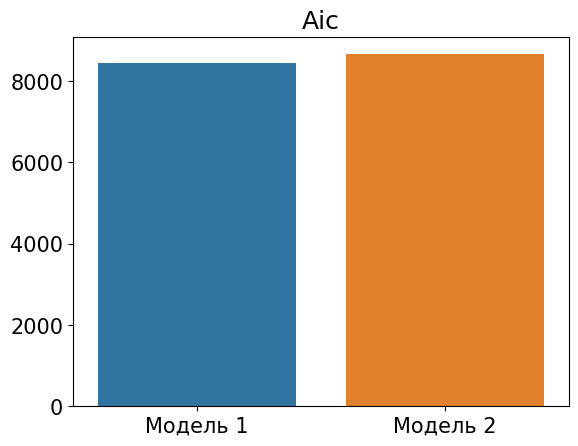

In [8]:
import statsmodels.api as sm
y = df['score']
X = df.drop('score', axis=1)
X1 = df.drop(['score','editors_choice'], axis=1)
X = sm.add_constant (X)
X1 = sm.add_constant (X1)

model = sm. OLS (y, X). fit ()
model1 = sm. OLS (y, X1). fit ()

print('Модель 1' )
print('Aic:',model.aic )
print('Bic:',model. bic )
print('Модель 2')
print('Aic:',model1. aic )
print('Bic:',model1. bic )
plt.hist(x=[model.aic,model1. aic], bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

##3.Продемонстрировать примеры оценивания моделей с использованием метрик accuracy, точность, полнота, F-мера в задачах классификации.  


Confusion matrix, without normalization
[[4823  163]
 [ 236  925]]


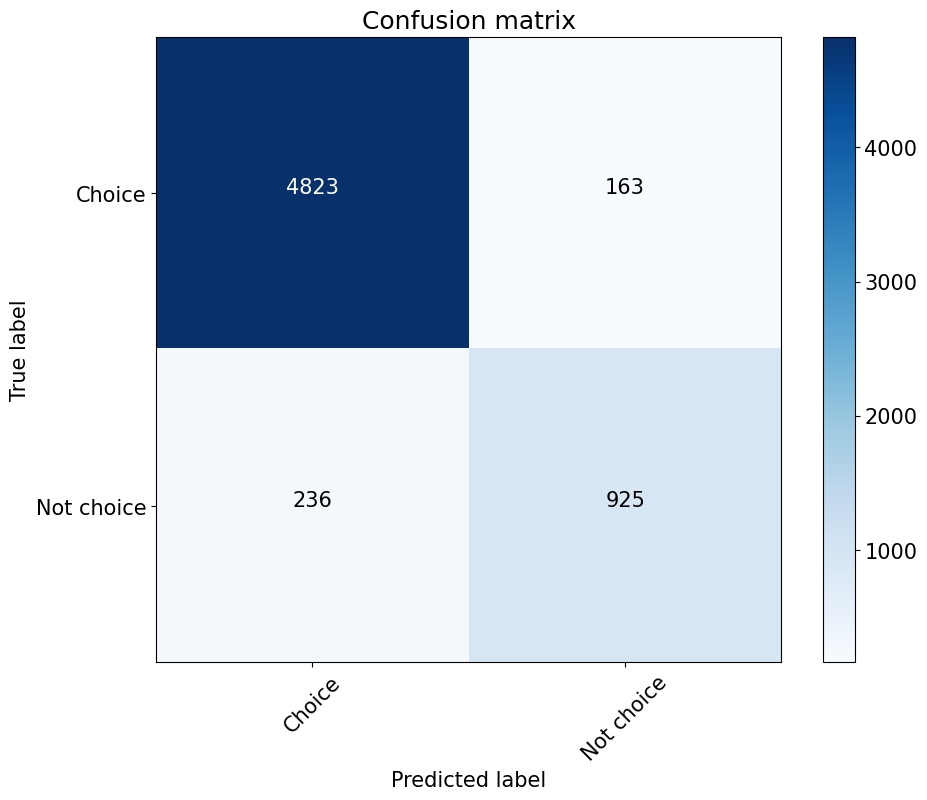

In [9]:
X = df.drop('editors_choice', axis=1)
y = df['editors_choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

logr = LogisticRegression(random_state=42)
logr.fit(X_train, y_train)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, logr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Choice', 'Not choice'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()


In [10]:
report = classification_report(y_test, logr.predict(X_test), target_names=['Choice', 'Not choice'])
print(report)

              precision    recall  f1-score   support

      Choice       0.95      0.97      0.96      4986
  Not choice       0.85      0.80      0.82      1161

    accuracy                           0.94      6147
   macro avg       0.90      0.88      0.89      6147
weighted avg       0.93      0.94      0.93      6147



##4.Продемонстрировать примеры различных соотношений для AUC-ROC.

LogisticRegression: ROC AUC=0.978


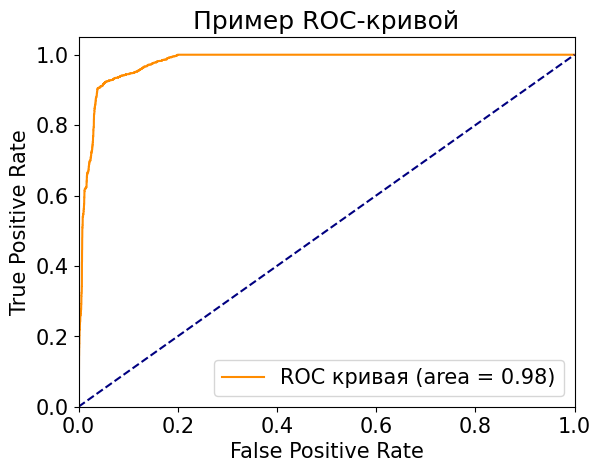

LogisticRegression: ROC AUC=0.903


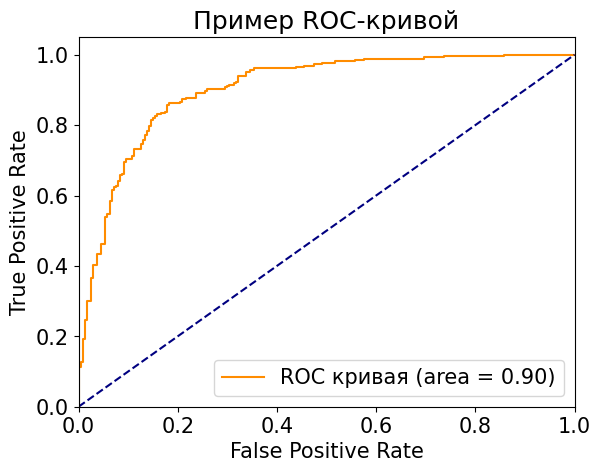

In [11]:
X = df.drop('editors_choice', axis=1)
y = df['editors_choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

logr = LogisticRegression(solver='lbfgs')
logr.fit(X_train, y_train)
lr = logr.predict_proba(X_test)
lr = lr[:, 1]
lr_auc = roc_auc_score(y_test, lr)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()


X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

##5.Реализовать логистическую регрессию для задачи классификации.


In [12]:
import numpy as np

# Подготовка данных (пример)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([0, 0, 1, 1])

# Инициализация параметров модели
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Функция сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция для обучения модели
def train(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights, bias = initialize_parameters(n_features)

    for _ in range(num_iterations):
        # Вычисляем линейную комбинацию и сигмоиду
        linear_combination = np.dot(X, weights) + bias
        predictions = sigmoid(linear_combination)

        # Вычисляем градиент
        dw = (1/n_samples) * np.dot(X.T, (predictions - y))
        db = (1/n_samples) * np.sum(predictions - y)

        # Обновляем параметры
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Обучение модели
learning_rate = 0.01
num_iterations = 1000
trained_weights, trained_bias = train(X, y, learning_rate, num_iterations)

# Предсказание
def predict(X, weights, bias):
    linear_combination = np.dot(X, weights) + bias
    predictions = sigmoid(linear_combination)
    return [1 if p >= 0.5 else 0 for p in predictions]

new_data = np.array([[5, 6]])
prediction = predict(new_data, trained_weights, trained_bias)
print("Предсказание:", prediction)

Предсказание: [1]


##6.Продемонстрировать примеры оценивания моделей с использованием метрик MSE (RMSE), MAE, MAPE, SMAPE и WAPE в задачах регрессии.

In [13]:
from sklearn. metrics import mean_absolute_error as mae
y = df.score.values.reshape(-1, 1)

n = df.score.count()
columbs = ['score_phrase', 'release_month', 'editors_choice']
X = np.hstack((np.ones(n).reshape(-1, 1), df[columbs].values))
linr = LinearRegression()
linr.fit(y=y, X=X)
X_pred = linr.predict(X)
def mse(actual, pred):
 actual, pred = np.array(actual), np.array(pred)
 return np.square(np.subtract(actual,pred)).mean()
def rmse(actual, pred):
 actual, pred = np.array(actual), np.array(pred)
 return np.sqrt(np.square(np.subtract(actual,pred)).mean())
def mape( actual , pred ):
 actual, pred = np.array(actual), np.array(pred)
 return np.mean(np.abs((actual - pred) / actual))*100
def smape( actual , pred ):
 actual, pred = np.array(actual), np.array(pred)
 return 1/ len (actual) * np.sum (2 * np.abs (pred-actual) / (np.abs (actual) + np.abs (pred)))*100
def wape( actual , pred ):
 actual, pred = np.array(actual), np.array(pred)
 return np.sum(np.abs(actual - pred))/ np.sum(np.abs(actual))*100

print('MSE:',mse(y,X_pred))
print('RMSE:',rmse(y,X_pred))
print('MAE:',mae(y,X_pred))
print('MAPE:',mape(y,X_pred))
print('SMAPE:',smape(y,X_pred))
print('WAPE:',wape(y,X_pred))

MSE: 0.09214789621112857
RMSE: 0.30355871954389413
MAE: 0.2704071107863362
MAPE: 4.378596650914043
SMAPE: 4.3384448760189915
WAPE: 3.890492821213306


##7.С использованием метрик, оценить качество заполнения пропусков в пользовательских данных.

Заполнение медианой:
MSE: 18.56089618406285
RMSE: 4.308235855203711
MAE: 1.240774410774411
MAPE: 4.466302669743733
SMAPE: 5.007106214088176
WAPE: 4.225843110227869

Заполнение модой:
MSE: 21.307473063973063
RMSE: 4.616001848350265
MAE: 1.542233445566779
MAPE: 6.460784525336699
SMAPE: 6.274964557408273
WAPE: 5.398659577569317

Заполнение медианой по группам:
MSE: 9.968752525252526
RMSE: 3.1573331349815663
MAE: 0.9384175084175084
MAPE: 3.7432119744308148
SMAPE: 4.245303010772601
WAPE: 3.2234261928966887



<ipython-input-15-f540bebc0c54>:54: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))


<Axes: title={'center': 'Metrics'}>

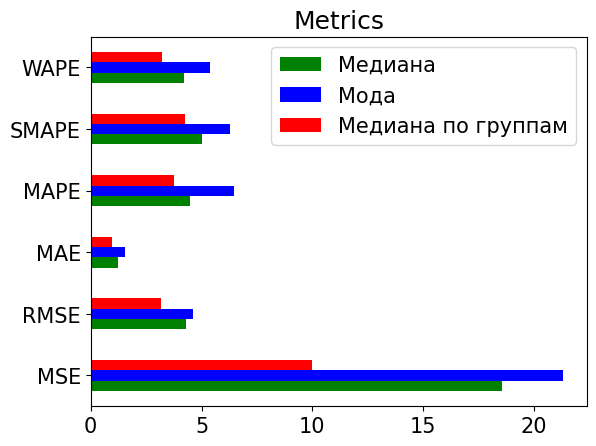

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
titanic = pd.read_csv('train.csv')
titanic.drop(['Cabin', 'Embarked','Name','Ticket'], axis= 1 , inplace= True )
patterns = {
    'female':1,
    "male":0
}
titanic = titanic.replace(patterns)
median_imputer = titanic.copy()
titanic_mode = titanic.copy()
median_imputer_bins = titanic.copy()

lr = titanic.copy()
scaler = StandardScaler()
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)
test = lr[lr['Age'].isnull()].copy()
train = lr.dropna().copy()
y_train = train['Age']
X_train = train.drop('Age', axis = 1)
X_test = test.drop('Age', axis = 1)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
test['Age'] = y_pred
lr = pd.concat([train, test])
lr.sort_index(inplace = True)
lr = pd.DataFrame(scaler.inverse_transform(lr), columns = lr.columns)
lr.Age = lr.Age.round(1)

imp_median = SimpleImputer(strategy = 'median')
median_imputer['Age'] = imp_median.fit_transform(median_imputer[['Age']])
print('Заполнение медианой:')
print('MSE:',mse(median_imputer['Age'],lr.Age))
print('RMSE:',rmse(median_imputer['Age'],lr.Age))
print('MAE:',mae(median_imputer['Age'],lr.Age))
print('MAPE:',mape(median_imputer['Age'],lr.Age))
print('SMAPE:',smape(median_imputer['Age'],lr.Age))
print('WAPE:',wape(median_imputer['Age'],lr.Age))
print()

imp_most_freq = SimpleImputer(strategy = 'most_frequent')
titanic_mode['Age'] = imp_most_freq.fit_transform(titanic_mode[['Age']])
print('Заполнение модой:')
print('MSE:',mse(titanic_mode['Age'],lr.Age))
print('RMSE:',rmse(titanic_mode['Age'],lr.Age))
print('MAE:',mae(titanic_mode['Age'],lr.Age))
print('MAPE:',mape(titanic_mode['Age'],lr.Age))
print('SMAPE:',smape(titanic_mode['Age'],lr.Age))
print('WAPE:',wape(titanic_mode['Age'],lr.Age))
print()

Age_bins = median_imputer_bins.groupby(['Sex', 'Pclass'])
median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))
print('Заполнение медианой по группам:')
print('MSE:',mse(median_imputer_bins.Age,lr.Age))
print('RMSE:',rmse(median_imputer_bins.Age,lr.Age))
print('MAE:',mae(median_imputer_bins.Age,lr.Age))
print('MAPE:',mape(median_imputer_bins.Age,lr.Age))
print('SMAPE:',smape(median_imputer_bins.Age,lr.Age))
print('WAPE:',wape(median_imputer_bins.Age,lr.Age))
print()


metr = pd.DataFrame({'Медиана': [mse(median_imputer['Age'],lr.Age),rmse(median_imputer['Age'],lr.Age),mae(median_imputer['Age'],lr.Age),mape(median_imputer['Age'],lr.Age),smape(median_imputer['Age'],lr.Age),wape(median_imputer['Age'],lr.Age)],
                   'Мода': [mse(titanic_mode['Age'],lr.Age), rmse(titanic_mode['Age'],lr.Age), mae(titanic_mode['Age'],lr.Age),mape(titanic_mode['Age'],lr.Age),smape(titanic_mode['Age'],lr.Age),wape(titanic_mode['Age'],lr.Age)],
                     'Медиана по группам':[mse(median_imputer_bins['Age'],lr.Age),rmse(median_imputer_bins['Age'],lr.Age),mae(median_imputer_bins['Age'],lr.Age),mape(median_imputer_bins['Age'],lr.Age),smape(median_imputer_bins['Age'],lr.Age),wape(median_imputer_bins['Age'],lr.Age)],},
                  index=['MSE', 'RMSE', 'MAE', 'MAPE', 'SMAPE', 'WAPE'])

metr.plot.barh(title="Metrics",
             color={"green", "red","blue"})


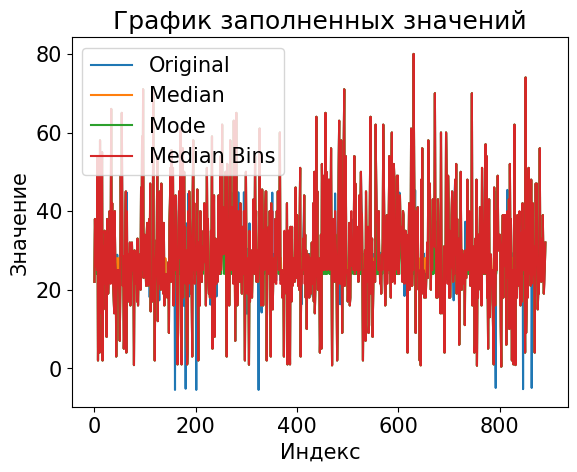

In [35]:
fig, ax = plt.subplots()
ax.plot(lr['Age'], label='Original')
ax.plot(median_imputer['Age'], label='Median')
ax.plot(titanic_mode['Age'], label='Mode')
ax.plot(median_imputer_bins.Age, label='Median Bins')

# Настройка графика
ax.legend()
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение')
ax.set_title('График заполненных значений')

# Отображение графика
plt.show()

## 8.Програмная реализация метода кластеризации.

In [40]:
import numpy as np
from sklearn.cluster import KMeans

class kmeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iterations):
            labels = self._assign_labels(X)

            updated_centroids = self._update_centroids(X, labels)

            if np.all(self.centroids == updated_centroids):
                break

            self.centroids = updated_centroids

    def _assign_labels(self, X):
        labels = []
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            labels.append(np.argmin(distances))
        return np.array(labels)

    def _update_centroids(self, X, labels):
        updated_centroids = np.zeros_like(self.centroids)
        counts = np.zeros(self.n_clusters)
        for i in range(X.shape[0]):
            label = labels[i]
            updated_centroids[label] += X[i]
            counts[label] += 1
        return updated_centroids / counts[:, np.newaxis]


data = np.random.rand(10000, 2) * 10
km = kmeans(n_clusters=3)
km.fit(data)
kmeans_sklearn = KMeans(n_clusters=3, random_state=0)
kmeans_sklearn.fit(data)
print('Центроиды ручные :',km.centroids)
print('Центроиды встроенные :',kmeans_sklearn.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Центроиды ручные : [[7.70985515 3.17641142]
 [2.36370755 3.1069629 ]
 [4.90962362 8.0509639 ]]
Центроиды встроенные : [[7.72374517 3.23827896]
 [2.38307786 3.06805269]
 [4.84342568 8.06041814]]
